Posteriormente trataremos los datos:

- Gestión de valores nulos
- Gestión de outliers
- Codificación
- Estandarización

In [171]:
import pandas as pd
import numpy as np

import sys
sys.path.append("../../")
from src import soporte_sql as s_sql, soporte_eda_y_outliers as s_eda, soporte_ajuste_regresion as s_regresion, soporte_clustering as s_clustering

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
df = pd.read_csv("../../CSV/Bdd_coches.csv", index_col = 0)

In [110]:
df.head()

,model_id,marca,modelo_dgt,año_modelo,combustible,tipo_distintivo,catelec,provincia,matriculados,tipo_carroceria,...,lon_a,Lon_b,maletero_a,Maletero_b,Aut,Man,4x4,Del,Tras,CCAA
0,explorer_2024_1,ford,EXPLORER,1999,1.0,SIN DISTINTIVO,NO ELÉCTRICO,3,1,estandar,...,4.47,NaN,470.0,NaN,1,0,1,0,1,Comunidad Valenciana
1,explorer_2024_1,ford,EXPLORER,1999,1.0,SIN DISTINTIVO,NO ELÉCTRICO,13,2,estandar,...,4.47,NaN,470.0,NaN,1,0,1,0,1,Castilla-La Mancha
2,explorer_2024_1,ford,EXPLORER,1999,1.0,SIN DISTINTIVO,NO ELÉCTRICO,17,1,estandar,...,4.47,NaN,470.0,NaN,1,0,1,0,1,Cataluña
3,explorer_2024_1,ford,EXPLORER,1999,1.0,SIN DISTINTIVO,NO ELÉCTRICO,19,1,estandar,...,4.47,NaN,470.0,NaN,1,0,1,0,1,Castilla-La Mancha
4,explorer_2024_1,ford,EXPLORER,1999,1.0,SIN DISTINTIVO,NO ELÉCTRICO,28,7,estandar,...,4.47,NaN,470.0,NaN,1,0,1,0,1,Madrid


Vamos a gestionar los valores nulos. En este caso los tenemos en Traccion, cambio y maleteros. No tiene sentido inferenciar nulos aquí porque vamos a aplicarle dummies a cambio y tracción, mientras que maletero b y lon b nos dan a entender si existe un modelo "ranchera" del coche. Por lo que un 0 nos sigue dando información real, aunque las convertiremos en dummy. Para longitud y maletero principales se utilizará el knnn imputer. En el caso del precio los eliminamos directamente

In [111]:
print(df.isnull().sum() / df.shape[0] * 100)

model_id              0.000000
marca                 0.000000
modelo_dgt            0.000000
año_modelo            0.000000
combustible           0.000000
tipo_distintivo       0.000000
catelec               0.000000
provincia             0.000000
matriculados          0.000000
tipo_carroceria       0.000000
año_review            0.000000
precio_base           2.115376
precio_max            2.115376
potencia_minima       0.000000
potencia_maxima       0.000000
tipo_conduccion       0.000000
interior              0.000000
espacio_interior      0.000000
sensaciones_motor     0.000000
lon_a                 2.493409
Lon_b                76.024845
maletero_a            4.513160
Maletero_b           44.302248
Aut                   0.000000
Man                   0.000000
4x4                   0.000000
Del                   0.000000
Tras                  0.000000
CCAA                  0.000000
dtype: float64


In [112]:
df.head()

,model_id,marca,modelo_dgt,año_modelo,combustible,tipo_distintivo,catelec,provincia,matriculados,tipo_carroceria,...,lon_a,Lon_b,maletero_a,Maletero_b,Aut,Man,4x4,Del,Tras,CCAA
0,explorer_2024_1,ford,EXPLORER,1999,1.0,SIN DISTINTIVO,NO ELÉCTRICO,3,1,estandar,...,4.47,NaN,470.0,NaN,1,0,1,0,1,Comunidad Valenciana
1,explorer_2024_1,ford,EXPLORER,1999,1.0,SIN DISTINTIVO,NO ELÉCTRICO,13,2,estandar,...,4.47,NaN,470.0,NaN,1,0,1,0,1,Castilla-La Mancha
2,explorer_2024_1,ford,EXPLORER,1999,1.0,SIN DISTINTIVO,NO ELÉCTRICO,17,1,estandar,...,4.47,NaN,470.0,NaN,1,0,1,0,1,Cataluña
3,explorer_2024_1,ford,EXPLORER,1999,1.0,SIN DISTINTIVO,NO ELÉCTRICO,19,1,estandar,...,4.47,NaN,470.0,NaN,1,0,1,0,1,Castilla-La Mancha
4,explorer_2024_1,ford,EXPLORER,1999,1.0,SIN DISTINTIVO,NO ELÉCTRICO,28,7,estandar,...,4.47,NaN,470.0,NaN,1,0,1,0,1,Madrid


In [113]:
df = df.dropna(subset=["precio_base"])
df = df.dropna(subset=["precio_max"])

In [114]:
df.head()

,model_id,marca,modelo_dgt,año_modelo,combustible,tipo_distintivo,catelec,provincia,matriculados,tipo_carroceria,...,lon_a,Lon_b,maletero_a,Maletero_b,Aut,Man,4x4,Del,Tras,CCAA
0,explorer_2024_1,ford,EXPLORER,1999,1.0,SIN DISTINTIVO,NO ELÉCTRICO,3,1,estandar,...,4.47,NaN,470.0,NaN,1,0,1,0,1,Comunidad Valenciana
1,explorer_2024_1,ford,EXPLORER,1999,1.0,SIN DISTINTIVO,NO ELÉCTRICO,13,2,estandar,...,4.47,NaN,470.0,NaN,1,0,1,0,1,Castilla-La Mancha
2,explorer_2024_1,ford,EXPLORER,1999,1.0,SIN DISTINTIVO,NO ELÉCTRICO,17,1,estandar,...,4.47,NaN,470.0,NaN,1,0,1,0,1,Cataluña
3,explorer_2024_1,ford,EXPLORER,1999,1.0,SIN DISTINTIVO,NO ELÉCTRICO,19,1,estandar,...,4.47,NaN,470.0,NaN,1,0,1,0,1,Castilla-La Mancha
4,explorer_2024_1,ford,EXPLORER,1999,1.0,SIN DISTINTIVO,NO ELÉCTRICO,28,7,estandar,...,4.47,NaN,470.0,NaN,1,0,1,0,1,Madrid


In [115]:
from sklearn.impute import KNNImputer
imputer_knn = KNNImputer(n_neighbors=5)
knn_imputado = imputer_knn.fit_transform(df[["lon_a","maletero_a"]])

nuevas_columnas_knn = [col + "_knn" for col in ["lon_a","maletero_a"]]
df[nuevas_columnas_knn] = knn_imputado

df = df.drop(columns= ["lon_a","maletero_a"])

In [116]:
df = df.fillna(0)

GEstionamos outliers

Tenemos varios valores outliers, expecialmente en matriculados y precios. Las potencias las dejaremos por ahora como están. Vemos que en maletero b Tenemos un montón de nulos. Lo convertiremos en una dummy

In [117]:
#vamos a analizar los outliers en matriculados y precio

## Para el precio haremos un análisis LOF. Puesto que todos los coches se encuentran más o menos entre las mismas cotas, es muy difícil encontrar outliers globales. LOF nos permite optimizar la busqueda para outliers locales.

outliers = s_eda.GestionOutliersMultivariados(df)

df_lof = outliers.detectar_outliers_lof()
# outliers.explorar_outliers_lof(var_dependiente="matriculados")


In [118]:
df_outliers,df_noabs = outliers.eliminar_outliers_porcj(df_lof)

se han eliminado 1077 columnas


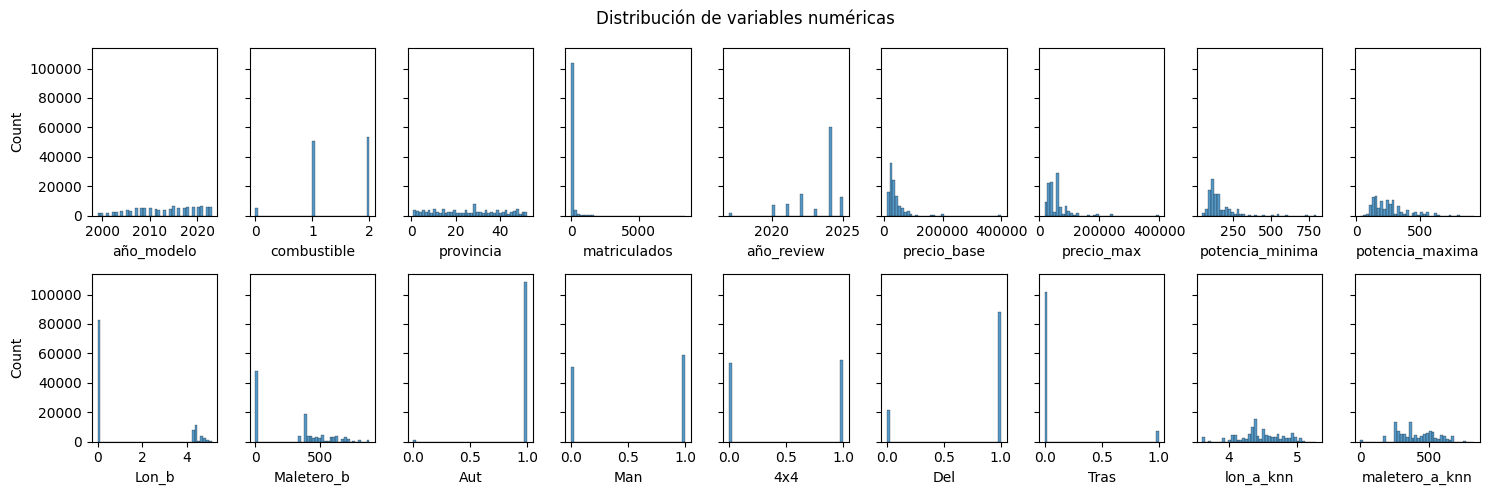

In [119]:
visual = s_eda.Visualizador(df)
visual.plot_numericas()

Hay muchos valores muy bajos, para equilibrar la distribución vamos a organizar en torno a CCAAs

In [120]:
df_noabs.drop(columns = ["Lon_b", "model_id", "provincia"], inplace=True)

# df_noabs = pd.pivot_table(df_noabs, 
#                            values = "matriculados", 
#                            index=df_noabs.drop(columns = ["matriculados","CCAA"]), 
#                            columns=["CCAA"], 
#                            aggfunc = "sum")

In [121]:
# df_noabs = df_noabs.reset_index()
# print(df_noabs.columns)
# df_noabs = df_noabs.fillna(0)
# df_noabs["total_matriculados"] = df_noabs[['Andalucía', 'Aragón',
#        'Asturias', 'Canarias', 'Cantabria', 'Castilla y León',
#        'Castilla-La Mancha', 'Cataluña', 'Ceuta', 'Comunidad Valenciana',
#        'Extremadura', 'Galicia', 'Islas Baleares', 'La Rioja', 'Madrid',
#        'Melilla', 'Murcia', 'Navarra', 'País Vasco']].sum(axis = 1)

Estandarización

In [122]:
df_noabs

,marca,modelo_dgt,año_modelo,combustible,tipo_distintivo,catelec,matriculados,tipo_carroceria,año_review,precio_base,...,sensaciones_motor,Maletero_b,Aut,Man,4x4,Del,Tras,CCAA,lon_a_knn,maletero_a_knn
0,ford,EXPLORER,1999,1.0,SIN DISTINTIVO,NO ELÉCTRICO,1,estandar,2024,41812.0,...,buen motor,0.0,1,0,1,0,1,Comunidad Valenciana,4.47,470.0
1,ford,EXPLORER,1999,1.0,SIN DISTINTIVO,NO ELÉCTRICO,2,estandar,2024,41812.0,...,buen motor,0.0,1,0,1,0,1,Castilla-La Mancha,4.47,470.0
2,ford,EXPLORER,1999,1.0,SIN DISTINTIVO,NO ELÉCTRICO,1,estandar,2024,41812.0,...,buen motor,0.0,1,0,1,0,1,Cataluña,4.47,470.0
3,ford,EXPLORER,1999,1.0,SIN DISTINTIVO,NO ELÉCTRICO,1,estandar,2024,41812.0,...,buen motor,0.0,1,0,1,0,1,Castilla-La Mancha,4.47,470.0
4,ford,EXPLORER,1999,1.0,SIN DISTINTIVO,NO ELÉCTRICO,7,estandar,2024,41812.0,...,buen motor,0.0,1,0,1,0,1,Madrid,4.47,470.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111890,mazda,MX 30,2023,1.0,CERO,PHEV,9,estandar,2020,32550.0,...,buen motor,350.0,1,0,0,1,0,Cataluña,4.40,332.0
111891,mazda,MX 30,2023,1.0,CERO,PHEV,26,estandar,2020,32550.0,...,buen motor,350.0,1,0,0,1,0,Madrid,4.40,332.0
111892,mazda,MX 30,2023,1.0,CERO,PHEV,3,estandar,2020,32550.0,...,buen motor,350.0,1,0,0,1,0,Murcia,4.40,332.0
111893,mazda,MX 30,2023,1.0,CERO,PHEV,1,estandar,2020,32550.0,...,buen motor,350.0,1,0,0,1,0,Castilla-La Mancha,4.40,332.0


In [158]:
from sklearn.preprocessing import StandardScaler

# Excluir las columnas no numéricas (ya que solo quieres escalar las numéricas)
columnas_no_num = ["catelec", "tipo_distintivo", "tipo_carroceria", "combustible"]
columnas_nums = df_noabs.drop(columns=columnas_no_num).select_dtypes(include=np.number).columns

# Inicializar el escalador
scaler = StandardScaler()

# Crear una copia del DataFrame para no modificar el original
df_scaled = df_noabs.copy()

# Aplicar el StandardScaler solo a las columnas numéricas
df_scaled[columnas_nums] = scaler.fit_transform(df_noabs[columnas_nums])



Codificación

In [159]:
df_scaled

,marca,modelo_dgt,año_modelo,combustible,tipo_distintivo,catelec,matriculados,tipo_carroceria,año_review,precio_base,...,sensaciones_motor,Maletero_b,Aut,Man,4x4,Del,Tras,CCAA,lon_a_knn,maletero_a_knn
0,ford,EXPLORER,-2.148884,1.0,SIN DISTINTIVO,NO ELÉCTRICO,-0.330186,estandar,0.499844,0.146595,...,buen motor,-1.057579,0.093806,-1.083422,0.982767,-2.052801,3.739460,Comunidad Valenciana,0.016020,0.431961
1,ford,EXPLORER,-2.148884,1.0,SIN DISTINTIVO,NO ELÉCTRICO,-0.323008,estandar,0.499844,0.146595,...,buen motor,-1.057579,0.093806,-1.083422,0.982767,-2.052801,3.739460,Castilla-La Mancha,0.016020,0.431961
2,ford,EXPLORER,-2.148884,1.0,SIN DISTINTIVO,NO ELÉCTRICO,-0.330186,estandar,0.499844,0.146595,...,buen motor,-1.057579,0.093806,-1.083422,0.982767,-2.052801,3.739460,Cataluña,0.016020,0.431961
3,ford,EXPLORER,-2.148884,1.0,SIN DISTINTIVO,NO ELÉCTRICO,-0.330186,estandar,0.499844,0.146595,...,buen motor,-1.057579,0.093806,-1.083422,0.982767,-2.052801,3.739460,Castilla-La Mancha,0.016020,0.431961
4,ford,EXPLORER,-2.148884,1.0,SIN DISTINTIVO,NO ELÉCTRICO,-0.287119,estandar,0.499844,0.146595,...,buen motor,-1.057579,0.093806,-1.083422,0.982767,-2.052801,3.739460,Madrid,0.016020,0.431961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111890,mazda,MX 30,1.508788,1.0,CERO,PHEV,-0.272764,estandar,-1.966538,-0.165512,...,buen motor,0.257977,0.093806,-1.083422,-1.017535,0.487139,-0.267418,Cataluña,-0.209722,-0.588054
111891,mazda,MX 30,1.508788,1.0,CERO,PHEV,-0.150741,estandar,-1.966538,-0.165512,...,buen motor,0.257977,0.093806,-1.083422,-1.017535,0.487139,-0.267418,Madrid,-0.209722,-0.588054
111892,mazda,MX 30,1.508788,1.0,CERO,PHEV,-0.315831,estandar,-1.966538,-0.165512,...,buen motor,0.257977,0.093806,-1.083422,-1.017535,0.487139,-0.267418,Murcia,-0.209722,-0.588054
111893,mazda,MX 30,1.508788,1.0,CERO,PHEV,-0.330186,estandar,-1.966538,-0.165512,...,buen motor,0.257977,0.093806,-1.083422,-1.017535,0.487139,-0.267418,Castilla-La Mancha,-0.209722,-0.588054


In [160]:
df_scaled["catelec"]

0         NO ELÉCTRICO
1         NO ELÉCTRICO
2         NO ELÉCTRICO
3         NO ELÉCTRICO
4         NO ELÉCTRICO
              ...     
111890            PHEV
111891            PHEV
111892            PHEV
111893            PHEV
111894            PHEV
Name: catelec, Length: 108451, dtype: object

In [161]:
#Dummies para maletero b, catelec, distintivo ambiental, carroeria
df_scaled["Maletero_b"].apply(lambda x: 1 if x != 0 else 0)

df_dummies_catelec = pd.get_dummies(df_scaled["catelec"],dtype = int)
df_scaled = df_scaled.join(df_dummies_catelec)

df_dummies_distintivo = pd.get_dummies(df_scaled["tipo_distintivo"],dtype = int)
df_scaled = df_scaled.join(df_dummies_distintivo)

df_dummies_corroceria = pd.get_dummies(df_scaled["tipo_carroceria"],dtype = int)
df_scaled = df_scaled.join(df_dummies_corroceria)

# df_dummies_combust = pd.get_dummies(df_scaled["combustible"],dtype = int)
# df_scaled = df_scaled.join(df_dummies_combust)

dum_sensaciones_motor = pd.get_dummies(df_scaled["sensaciones_motor"],dtype = int)
df_scaled = df_scaled.join(dum_sensaciones_motor)

dum_espacio_interior = pd.get_dummies(df_scaled["espacio_interior"],dtype = int)
df_scaled = df_scaled.join(dum_espacio_interior)

dum_interior = pd.get_dummies(df_scaled["interior"],dtype = int)
df_scaled = df_scaled.join(dum_interior)

dum_tipo_conduccion = pd.get_dummies(df_scaled["tipo_conduccion"],dtype = int)
df_scaled = df_scaled.join(dum_tipo_conduccion)

df_scaled.drop(columns = ["catelec","tipo_distintivo","tipo_carroceria",'tipo_conduccion', 'interior', 'espacio_interior', 'sensaciones_motor'],inplace = True)

#Label encoder para marca y modelo
from sklearn.preprocessing import LabelEncoder

encoder_marca = LabelEncoder()
encoder_modelo = LabelEncoder()
encoder_ccaa = LabelEncoder()

df_scaled["modelo_dgt"] = encoder_modelo.fit_transform(df_noabs["modelo_dgt"])
df_scaled["CCAA"] = encoder_ccaa.fit_transform(df_noabs["CCAA"])
df_scaled["marca"] = encoder_marca.fit_transform(df_noabs["marca"])

Vamos a estandarizar

In [162]:
df_scaled.columns


Index(['marca', 'modelo_dgt', 'año_modelo', 'combustible', 'matriculados',
       'año_review', 'precio_base', 'precio_max', 'potencia_minima',
       'potencia_maxima', 'Maletero_b', 'Aut', 'Man', '4x4', 'Del', 'Tras',
       'CCAA', 'lon_a_knn', 'maletero_a_knn', 'BEV', 'HEV', 'NO ELÉCTRICO',
       'PHEV', 'REEV', 'CERO', 'DISTINTIVO B', 'DISTINTIVO C', 'ECO',
       'SIN DISTINTIVO', '3-puertas', '4-puertas', '5-puertas', 'allstreet',
       'berlina', 'compacta', 'coupe', 'cw', 'estandar', 'fastback',
       'gran-coupe', 'lwb', 'sportback', 'suv', 'touring', 'variant',
       'buen motor', 'mal motor', 'interior compacto', 'interior espacioso',
       'interior lujoso', 'interior no satisfactorio', 'interior simple',
       'confortable', 'deportivo', 'todoterreno'],
      dtype='object')

In [163]:
# df_scaled = df_scaled.drop(columns = ['Andalucía', 'Aragón',
#        'Asturias', 'Canarias', 'Cantabria', 'Castilla y León',
#        'Castilla-La Mancha', 'Cataluña', 'Ceuta', 'Comunidad Valenciana',
#        'Extremadura', 'Galicia', 'Islas Baleares', 'La Rioja', 'Madrid',
#        'Melilla', 'Murcia', 'Navarra', 'País Vasco'])

Modelo tonto por lo que pueda pasar

Aún tenemos outliers pero es que los coches difieren mucho de precio entre sí, y claramente existen categorías diferentes. Es lo que intentaremos averiguar al clusterizar. También existen años y ventas muy bajos. Vamos a clusterizar.

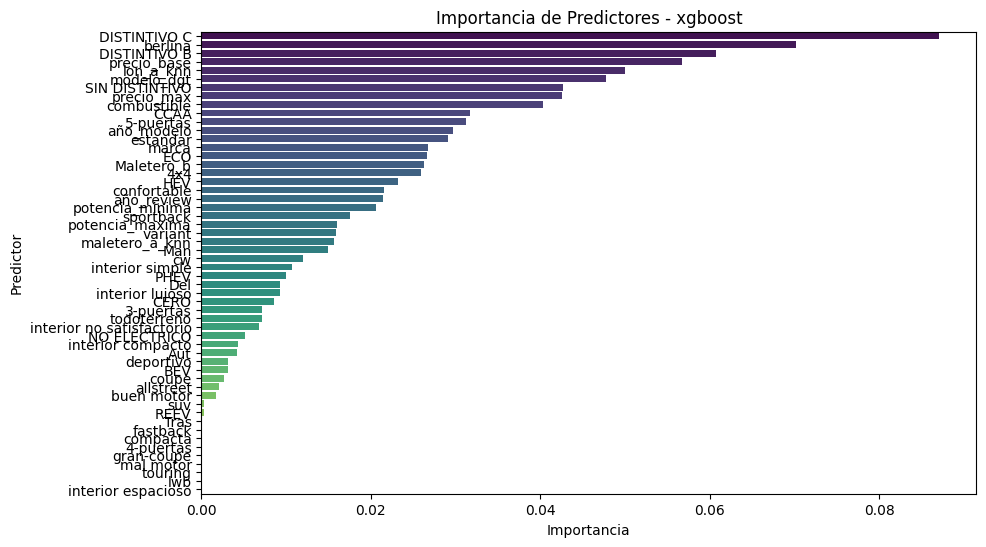

,train,test
R2,0.565190,0.511680
MAE,0.271948,0.280263
MSE,0.432083,0.500498
RMSE,0.657330,0.707459


In [168]:
analisis = s_regresion.AnalisisModelosRegresion(df_scaled, "matriculados")

# llamamos a la función para ajustar el modelo
analisis.ajustar_modelo(modelo='xgboost')

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = analisis.calcular_metricas(modelo = "xgboost")
analisis.importancia_predictores("xgboost")
df_resultados.head()

In [ ]:
cluster = s_clustering.Clustering(df_scaled)
cluster.sacar_clusters_kmeans()

Vamos a codificar